Import necessary packages.

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime

Import our data file that was saved from our Data Wrangling edits: 'Vehicle_Loan_DataWrang.csv': 'VL_df'

In [2]:
VL_df = pd.read_csv(f'./data/Vehicle_Loan_DataWrang.csv')
VL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      233154 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

The features 'Date.of.Birth' and 'DisbursalDate' are dates. We will store the year, month and day of each of those features as seperate columns. We will turn them into datetime objects and create those new features. 

In [4]:
# Turn these date features into datetime objects.
VL_df['Date.of.Birth'] = VL_df['Date.of.Birth'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
VL_df['DisbursalDate'] = VL_df['DisbursalDate'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [5]:
# Create separate year, month and day features for the feature 'Date.of.Birth'
VL_df['birth_year'] = VL_df['Date.of.Birth'].dt.year
VL_df['birth_month'] = VL_df['Date.of.Birth'].dt.month
VL_df['birth_day'] = VL_df['Date.of.Birth'].dt.day

# Create separate year, month and day features for the feature 'DisbursalDate'
VL_df['Disbursal_year'] = VL_df['DisbursalDate'].dt.year
VL_df['Disbursal_month'] = VL_df['DisbursalDate'].dt.month
VL_df['Disbursal_day'] = VL_df['DisbursalDate'].dt.day

In [6]:
# Take a look at the dateframe to see that the date components were extracted correctly.
VL_df[['Date.of.Birth', 'birth_year','birth_month', 'birth_day', 
       'DisbursalDate', 'Disbursal_year','Disbursal_month', 'Disbursal_day']]

,Date.of.Birth,birth_year,birth_month,birth_day,DisbursalDate,Disbursal_year,Disbursal_month,Disbursal_day
0,1984-01-01,1984,1,1,2018-08-03,2018,8,3
1,1985-07-31,1985,7,31,2018-09-26,2018,9,26
2,1985-08-24,1985,8,24,2018-08-01,2018,8,1
3,1993-12-30,1993,12,30,2018-10-26,2018,10,26
4,1977-12-09,1977,12,9,2018-09-26,2018,9,26
...,...,...,...,...,...,...,...,...
233149,1988-08-01,1988,8,1,2018-10-26,2018,10,26
233150,1988-12-05,1988,12,5,2018-10-23,2018,10,23
233151,1976-06-01,1976,6,1,2018-10-24,2018,10,24
233152,1994-03-26,1994,3,26,2018-09-29,2018,9,29


In [7]:
# Remove the original 'Date.of.Birth' and 'DisbursalDate' features as we have those new 
# features. Those new features will be much more useful for the model.

VL_df = VL_df.drop(['Date.of.Birth', 'DisbursalDate'], axis=1)
VL_df.info()    # Output to see that those two features are gone and replaced with new ones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 45 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Employment.Type                      233154 non-null  object 
 9   State_ID                             233154 non-null  int64  
 10  Employee_code_ID                     233154 non-null  int64  
 11  MobileNo_Avl_

The 'AVERAGE.ACCT.AGE' and 'CREDIT.HISTORY.LENGTH' features represent age or length of given account or credit. The values are stored as strings in a format such as '1yrs 11mon' 
representing 1 year and 11 months or 23 months. We want to convert these values to numerical months. 

In [8]:
# The first two lines remove the 'yrs' and 'mon' portion of the strings and save them 
# in a new dataframe column VL_df['AVG.ACCT.AGE']. The last line will turn it into the age
# in numerical months.
VL_df['AVG.ACCT.AGE'] = VL_df['AVERAGE.ACCT.AGE'].apply(lambda x: x.replace('mon',''))
VL_df['AVG.ACCT.AGE'] = VL_df['AVG.ACCT.AGE'].apply(lambda x: x.replace('yrs',''))
VL_df['AVG.ACCT.AGE'] = VL_df['AVG.ACCT.AGE'].apply(lambda x: 12*int(x[:x.find(' ')+1]) + int(x[x.find(' '):]))

# Similar as above but for credit history length.
VL_df['CRT.HISTORY.LENGTH'] = VL_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.replace('mon',''))
VL_df['CRT.HISTORY.LENGTH'] = VL_df['CRT.HISTORY.LENGTH'].apply(lambda x: x.replace('yrs',''))
VL_df['CRT.HISTORY.LENGTH'] = VL_df['CRT.HISTORY.LENGTH'].apply(lambda x: 12*int(x[:x.find(' ')+1]) + int(x[x.find(' '):]))

In [9]:
# Verify that the new feature values were computed correctly.
VL_df[['AVERAGE.ACCT.AGE', 'AVG.ACCT.AGE','CREDIT.HISTORY.LENGTH','CRT.HISTORY.LENGTH']]

,AVERAGE.ACCT.AGE,AVG.ACCT.AGE,CREDIT.HISTORY.LENGTH,CRT.HISTORY.LENGTH
0,0yrs 0mon,0,0yrs 0mon,0
1,1yrs 11mon,23,1yrs 11mon,23
2,0yrs 0mon,0,0yrs 0mon,0
3,0yrs 8mon,8,1yrs 3mon,15
4,0yrs 0mon,0,0yrs 0mon,0
...,...,...,...,...
233149,1yrs 9mon,21,3yrs 3mon,39
233150,0yrs 6mon,6,0yrs 6mon,6
233151,0yrs 0mon,0,0yrs 0mon,0
233152,0yrs 0mon,0,0yrs 0mon,0


In [10]:
# Drop the original columns.
VL_df = VL_df.drop(['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis=1)
VL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 45 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Employment.Type                      233154 non-null  object 
 9   State_ID                             233154 non-null  int64  
 10  Employee_code_ID                     233154 non-null  int64  
 11  MobileNo_Avl_

In [11]:
## We update our categorial columns list from the Exploratory Analysis section with 
## our new features.
categorical_cols = ['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 
                   'Current_pincode_ID', 'Employment.Type', 
                   'State_ID', 'Employee_code_ID', 
                   'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 
                   'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION',
                   'birth_year','birth_month','birth_day', 'Disbursal_year',
                   'Disbursal_month','Disbursal_day','AVG.ACCT.AGE', 'CRT.HISTORY.LENGTH']

In [12]:
## Check to see that they are categorical
VL_df[categorical_cols].head()

,UniqueID,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,...,Passport_flag,PERFORM_CNS.SCORE.DESCRIPTION,birth_year,birth_month,birth_day,Disbursal_year,Disbursal_month,Disbursal_day,AVG.ACCT.AGE,CRT.HISTORY.LENGTH
0,420825,67,22807,45,1441,Salaried,6,1998,1,1,...,0,No Bureau History Available,1984,1,1,2018,8,3,0,0
1,537409,67,22807,45,1502,Self employed,6,1998,1,1,...,0,I-Medium Risk,1985,7,31,2018,9,26,23,23
2,417566,67,22807,45,1497,Self employed,6,1998,1,1,...,0,No Bureau History Available,1985,8,24,2018,8,1,0,0
3,624493,67,22807,45,1501,Self employed,6,1998,1,1,...,0,L-Very High Risk,1993,12,30,2018,10,26,8,15
4,539055,67,22807,45,1495,Self employed,6,1998,1,1,...,0,No Bureau History Available,1977,12,9,2018,9,26,0,0


In [13]:
## We want number of unique values for each categorical variable.
for column in categorical_cols:
    print(len(VL_df[column].unique()),'unique values for', column)

233154 unique values for UniqueID
82 unique values for branch_id
2953 unique values for supplier_id
11 unique values for manufacturer_id
6698 unique values for Current_pincode_ID
3 unique values for Employment.Type
22 unique values for State_ID
3270 unique values for Employee_code_ID
1 unique values for MobileNo_Avl_Flag
2 unique values for Aadhar_flag
2 unique values for PAN_flag
2 unique values for VoterID_flag
2 unique values for Driving_flag
2 unique values for Passport_flag
20 unique values for PERFORM_CNS.SCORE.DESCRIPTION
48 unique values for birth_year
12 unique values for birth_month
31 unique values for birth_day
1 unique values for Disbursal_year
3 unique values for Disbursal_month
31 unique values for Disbursal_day
192 unique values for AVG.ACCT.AGE
294 unique values for CRT.HISTORY.LENGTH


Let's create dummy variables for these. We will not make dummy variables for UniqueID and MobileNo_Avl_Flag. UniqueID can act as our index or the unique loan. MobileNo_Avl_Flag has only one value. We can probably even omit it later on.

In [14]:
### Absence of one!! Get rid of original.
## Creating our Dummy Variables
dummies_branch = pd.get_dummies(VL_df['branch_id'], prefix='Branch_')
VL_df_revised = pd.concat([VL_df, dummies_branch], axis=1)

dummies_supplier = pd.get_dummies(VL_df['supplier_id'], prefix = 'Supp_')
VL_df_revised = pd.concat([VL_df_revised, dummies_supplier], axis=1)

dummies_manufacturer = pd.get_dummies(VL_df['manufacturer_id'], prefix='Manufact_')
VL_df_revised = pd.concat([VL_df_revised, dummies_manufacturer], axis=1)

dummies_CurrentPin = pd.get_dummies(VL_df['Current_pincode_ID'], prefix='CurrPIN_ID_')
VL_df_revised = pd.concat([VL_df_revised, dummies_CurrentPin], axis=1)


In [15]:
# Since employment types are given as strings not numbers, we will not specify a prefix.
dummies_employment = pd.get_dummies(VL_df['Employment.Type'])
# Want to specify other as other employment
dummies_employment.rename(columns = {'Other':'Other Employment'}, inplace=True) 
VL_df_revised = pd.concat([VL_df_revised, dummies_employment], axis=1)

dummies_state = pd.get_dummies(VL_df['State_ID'], prefix='state_')
VL_df_revised = pd.concat([VL_df_revised, dummies_state], axis=1)

dummies_employee = pd.get_dummies(VL_df['Employee_code_ID'], prefix='employee_')
VL_df_revised = pd.concat([VL_df_revised, dummies_employee], axis=1)

dummies_AadharFlag = pd.get_dummies(VL_df['Aadhar_flag'], prefix='AadharFlag_')
VL_df_revised = pd.concat([VL_df_revised, dummies_AadharFlag], axis=1)

In [16]:
dummies_PANFlag = pd.get_dummies(VL_df['PAN_flag'], prefix='PANFlag_')
VL_df_revised = pd.concat([VL_df_revised, dummies_PANFlag], axis=1)

dummies_VoterIDFlag = pd.get_dummies(VL_df['VoterID_flag'], prefix='VoterID_Flag_')
VL_df_revised = pd.concat([VL_df_revised, dummies_VoterIDFlag], axis=1)

dummies_DrivingFlag = pd.get_dummies(VL_df['Driving_flag'], prefix='DrivingFlag_')
VL_df_revised = pd.concat([VL_df_revised, dummies_DrivingFlag], axis=1)

dummies_PassportFlag = pd.get_dummies(VL_df['Passport_flag'], prefix='PassportFlag_')
VL_df_revised = pd.concat([VL_df_revised, dummies_PassportFlag], axis=1)

# Since PERFORM_CNS.SCORE.DESCRIPTION is given as strings not numbers, we will not specify a prefix.
dummies_PERFORM_CNS = pd.get_dummies(VL_df['PERFORM_CNS.SCORE.DESCRIPTION'])
VL_df_revised = pd.concat([VL_df_revised, dummies_PERFORM_CNS], axis=1)

In [17]:
dummies_birthYr = pd.get_dummies(VL_df['birth_year'], prefix='birthYR_')
VL_df_revised = pd.concat([VL_df_revised, dummies_birthYr], axis=1)

dummies_birthMn = pd.get_dummies(VL_df['birth_month'], prefix='birthMN_')
VL_df_revised = pd.concat([VL_df_revised, dummies_birthMn], axis=1)

dummies_birthDy = pd.get_dummies(VL_df['birth_day'], prefix='birthDY_')
VL_df_revised = pd.concat([VL_df_revised, dummies_birthDy], axis=1)

dummies_DisbYr = pd.get_dummies(VL_df['Disbursal_year'], prefix='DisbursalYR_')
VL_df_revised = pd.concat([VL_df_revised, dummies_DisbYr], axis=1)

dummies_DisbMn = pd.get_dummies(VL_df['Disbursal_month'], prefix='DisbursalMN_')
VL_df_revised = pd.concat([VL_df_revised, dummies_DisbMn], axis=1)

dummies_DisbDy = pd.get_dummies(VL_df['Disbursal_day'], prefix='DisbursalDY_')
VL_df_revised = pd.concat([VL_df_revised, dummies_DisbDy], axis=1)

In [18]:
dummies_Acct_age = pd.get_dummies(VL_df['AVG.ACCT.AGE'], prefix='Avg.ACCT.Age_')
VL_df_revised = pd.concat([VL_df_revised, dummies_Acct_age], axis=1)

dummies_CRT_Hist = pd.get_dummies(VL_df['CRT.HISTORY.LENGTH'], prefix='Crdt.Hist.Length_')
VL_df_revised = pd.concat([VL_df_revised, dummies_CRT_Hist], axis=1)

In [19]:
VL_df_revised = VL_df_revised.drop(['branch_id','supplier_id', 'manufacturer_id', 
                   'Current_pincode_ID', 'Employment.Type', 
                   'State_ID', 'Employee_code_ID', 
                   'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 
                   'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION',
                    'birth_year','birth_month','birth_day','Disbursal_year',
                    'Disbursal_month','Disbursal_day','AVG.ACCT.AGE', 'CRT.HISTORY.LENGTH'], axis = 1)

Let's explore our revised dataframe with dummy variables created for categorical variables.

In [20]:
VL_df_revised

,UniqueID,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,Crdt.Hist.Length__343,Crdt.Hist.Length__345,Crdt.Hist.Length__349,Crdt.Hist.Length__355,Crdt.Hist.Length__367,Crdt.Hist.Length__369,Crdt.Hist.Length__413,Crdt.Hist.Length__423,Crdt.Hist.Length__449,Crdt.Hist.Length__468
0,420825,50578,58400,89.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,598,1,1,1,27600,50200,...,0,0,0,0,0,0,0,0,0,0
2,417566,53278,61360,89.63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,305,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,539055,52378,60300,88.39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,735,4,3,0,390443,416133,...,0,0,0,0,0,0,0,0,0,0
233150,606141,73651,100600,74.95,825,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233151,613658,33484,71212,48.45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233152,548084,34259,73286,49.10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will now split the data set into training and test data and then perform standard scalers on the numerical columns.

In [21]:
# Splitting the training and testing data

X = VL_df_revised.loc[:, VL_df_revised.columns != 'loan_default']
y = VL_df_revised['loan_default']   # this is our predictor variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=26)

We will now plot boxplots for numerical features as they are, to see the scale differences. We will then perform normalization as well as standardization on there features and compare the scales by looking at the boxplots. 

Filter out the numerical features: 'ltv','disbursed_amount', 'asset_cost', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',  'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES'

We determined these features as numerical from the Exploratory Analysis section.

In [22]:
## First, save the numerical column names into a list, num_cols.
num_cols = ['ltv','disbursed_amount', 'asset_cost', 'PERFORM_CNS.SCORE', 
                'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 
                'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 
                'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 
                'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 
                'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
                'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES']

Use the StandardScaler to standardize each feature around their mean and respective standard deviations. 

In [23]:
# Data standardization
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]]) 

Here we plot boxplots for numerical variables before and after we standardize. We applied a log tranform base e, to make it more readable. You will see that the boxplots after standardization are better scaled.

/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/student/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


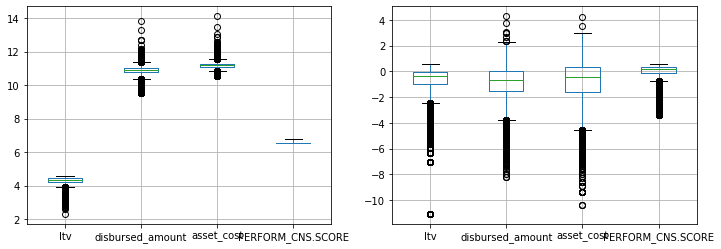

In [25]:
## USE LOG SCALE ON Y axis for both
## Boxplots Before and After Standardization: 'ltv','disbursed_amount', 
## 'asset_cost', and 'PERFORM_CNS.SCORE'
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
np.log(X_train[num_cols[0:4]]).boxplot()
plt.subplot(1,2,2)
np.log(X_train_stand[num_cols[0:4]]).boxplot()

/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/Users/student/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= lova

Text(0.5, 1.0, 'Log Transform Boxplots After Standardization')

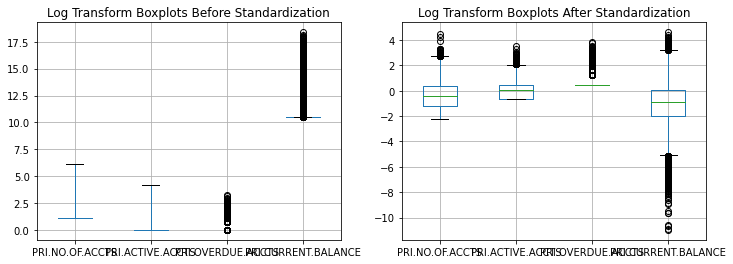

In [37]:
## Boxplots Before and After Standardization: 'PRI.NO.OF.ACCTS', 
## 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', and 'PRI.CURRENT.BALANCE'
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
ax = np.log(X_train[num_cols[4:8]]).boxplot()
ax.set_title('Log Transform Boxplots Before Standardization')

plt.subplot(1,2,2)
ax = np.log(X_train_stand[num_cols[4:8]]).boxplot()
ax.set_title('Log Transform Boxplots After Standardization')

/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/student/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  i

Text(0.5, 1.0, 'Log Transform Boxplots After Standardization')

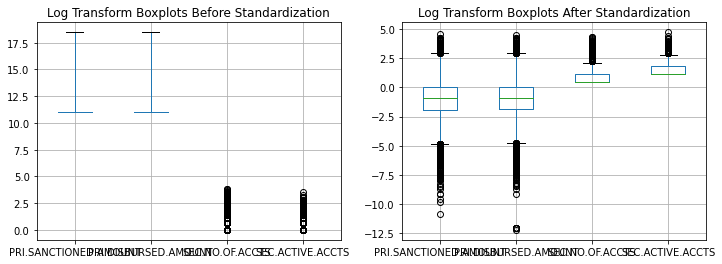

In [34]:
## Boxplots Before and After Standardization: 'PRI.SANCTIONED.AMOUNT', 
## 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', and 'SEC.ACTIVE.ACCTS'
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
ax = np.log(X_train[num_cols[8:12]]).boxplot()
ax.set_title('Log Transform Boxplots Before Standardization')

plt.subplot(1,2,2)
ax = np.log(X_train_stand[num_cols[8:12]]).boxplot()
ax.set_title('Log Transform Boxplots After Standardization')

/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/Users/student/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Us

Text(0.5, 1.0, 'Log Transform Boxplots After Standardization')

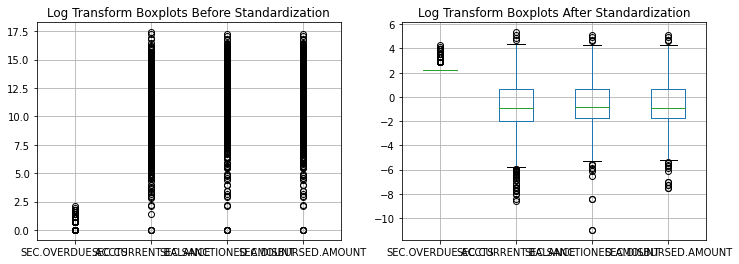

In [35]:
## Boxplots Before and After Standardization: 'SEC.OVERDUE.ACCTS', 
## 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 
## and 'SEC.DISBURSED.AMOUNT'
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
ax = np.log(X_train[num_cols[12:16]]).boxplot()
ax.set_title('Log Transform Boxplots Before Standardization')

plt.subplot(1,2,2)
ax = np.log(X_train_stand[num_cols[12:16]]).boxplot()
ax.set_title('Log Transform Boxplots After Standardization')

/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/student/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/student/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/student/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # R

Text(0.5, 1.0, 'Log Transform Boxplots After Standardization')

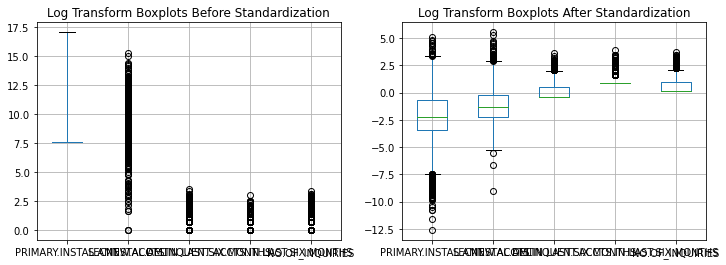

In [36]:
## Boxplots Before and After Standardization: 'PRIMARY.INSTAL.AMT', 
## 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
## 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', and 'NO.OF_INQUIRIES'
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
ax = np.log(X_train[num_cols[16:21]]).boxplot()
ax.set_title('Log Transform Boxplots Before Standardization')

plt.subplot(1,2,2)
ax = np.log(X_train_stand[num_cols[16:21]]).boxplot()
ax.set_title('Log Transform Boxplots After Standardization')

If we look at the statistics for the numerical features for X_train and X_train_stand (where X_train_stand is after the features are standardized), we see that the values are standardized around the mean for the features so we've scaled accordingly. 

In [30]:
X_train[num_cols].describe()

,ltv,disbursed_amount,asset_cost,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,186523.000000,186523.000000,1.865230e+05,186523.000000,186523.000000,186523.000000,186523.000000,1.865230e+05,1.865230e+05,1.865230e+05,...,186523.000000,186523.000000,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,186523.000000,186523.000000,186523.00000
mean,74.769823,54349.461696,7.582243e+04,288.181575,2.429309,1.033422,0.155616,1.646387e+05,2.113834e+05,2.109934e+05,...,0.027659,0.007281,5.567697e+03,7.457826e+03,7.334697e+03,1.330646e+04,3.310378e+02,0.379428,0.097296,0.20680
std,11.450810,12859.629179,1.866794e+04,338.154857,5.246080,1.912391,0.545803,9.533529e+05,1.128247e+06,1.135919e+06,...,0.317312,0.111337,1.727072e+05,1.851024e+05,1.844807e+05,1.603107e+05,1.668691e+04,0.947432,0.385035,0.70305
min,10.030000,13320.000000,3.700000e+04,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,...,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000
25%,68.900000,47145.000000,6.570500e+04,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000
50%,76.830000,53803.000000,7.093200e+04,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000
75%,83.690000,60413.000000,7.915200e+04,678.000000,3.000000,1.000000,0.000000,3.456200e+04,6.149000e+04,6.000000e+04,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.983000e+03,0.000000e+00,0.000000,0.000000,0.00000
max,95.000000,987354.000000,1.328954e+06,890.000000,453.000000,65.000000,25.000000,9.652492e+07,1.058657e+08,1.057557e+08,...,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,28.00000


In [31]:
X_train_stand[num_cols].describe()

,ltv,disbursed_amount,asset_cost,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,...,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05,1.865230e+05
mean,2.368445e-15,-3.471814e-16,-1.634758e-16,7.275147e-16,-7.646530e-16,-1.298592e-15,2.798540e-15,2.756963e-16,2.328381e-15,5.963505e-16,...,1.474659e-15,-5.066991e-16,9.481255e-16,-1.701868e-15,-2.769192e-15,2.332337e-15,-7.723548e-15,-1.686611e-15,7.234357e-16,3.640356e-15
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-5.653748e+00,-3.190572e+00,-2.079637e+00,-8.522200e-01,-4.630725e-01,-5.403837e-01,-2.851150e-01,-7.177775e+00,-1.873561e-01,-1.857474e-01,...,-8.716617e-02,-6.539267e-02,-3.359537e+00,-4.029038e-02,-3.975873e-02,-8.300440e-02,-1.983823e-02,-4.004814e-01,-2.526953e-01,-2.941478e-01
25%,-5.126134e-01,-5.602402e-01,-5.419696e-01,-8.522200e-01,-4.630725e-01,-5.403837e-01,-2.851150e-01,-1.726948e-01,-1.873561e-01,-1.857474e-01,...,-8.716617e-02,-6.539267e-02,-3.223786e-02,-4.029038e-02,-3.975873e-02,-8.300440e-02,-1.983823e-02,-4.004814e-01,-2.526953e-01,-2.941478e-01
50%,1.799158e-01,-4.249447e-02,-2.619701e-01,-8.522200e-01,-4.630725e-01,-5.403837e-01,-2.851150e-01,-1.726948e-01,-1.873561e-01,-1.857474e-01,...,-8.716617e-02,-6.539267e-02,-3.223786e-02,-4.029038e-02,-3.975873e-02,-8.300440e-02,-1.983823e-02,-4.004814e-01,-2.526953e-01,-2.941478e-01
75%,7.790017e-01,4.715186e-01,1.783582e-01,1.152784e+00,1.087846e-01,-1.747668e-02,-2.851150e-01,-1.364416e-01,-1.328555e-01,-1.329266e-01,...,-8.716617e-02,-6.539267e-02,-3.223786e-02,-4.029038e-02,-3.975873e-02,-7.063463e-02,-1.983823e-02,-4.004814e-01,-2.526953e-01,-2.941478e-01
max,1.766707e+00,7.255318e+01,6.712765e+01,1.779717e+00,8.588734e+01,3.344857e+01,4.551908e+01,1.010754e+02,9.364489e+01,9.291599e+01,...,1.133662e+02,7.178872e+01,2.086038e+02,1.620326e+02,1.625793e+02,1.598744e+02,2.499313e+02,3.654160e+01,5.169076e+01,3.953240e+01


Potential models: K nearest neighbor, Random Forrest (maximizing info), Guassian Process (GPC). Look at advantages and disadvantages of each one. Different statistics for each model so good to compare. Learn the assumptions. 